# Résolution d'Équations aux Dérivées partielles I

Objectifs :
- Résolution numérique par différences finies de l'équation de Poisson sur $[a,b]$.
- Mise en évidence numérique de l'ordre de convergence.


## Résolution de l'équation de Poisson sur $[a,b]$ par différences finies

### Résolution théorique

Pour $a<b$ et $f\in \mathcal C([a,b])$ on considère l'équation de Poisson avec conditions de Dirichlet :
$$
(1)\qquad \qquad \left\{ \begin{array}{l l}
-u''(x)=f(x), \qquad \forall x\in (a,b),\\
u(a)=\alpha, \quad u(b)=\beta .
\end{array} \right.
$$
On rappelle le résultat théorique suivant :

__Proposition 1 [Résolution de l'équation de Poisson 1d dans les espaces $C^k$]__

Si $f\in C([a,b],\mathbb R)$, alors il existe une unique fonction $u\in C^2([a,b],\mathbb R)$ qui résout (1). De plus, si pour $k\in \mathbb N$ on a $f\in C^k([a,b],\mathbb R)$ alors $u\in C^{2+k}([a,b],\mathbb R)$.

Une preuve de cette proposition est proposée dans l'Exercice 3.

### La méthode des différences finies

On souhaite maintenant résoudre numériquement (1). Pour $N\geq 1$, on subdivise $[a,b]$ en $N+1$ intervalles de taille  $\Delta x=\frac{b-a}{N+1}$ en posant $x_i=a+(i+1)\Delta x$ pour $i=-1,...,N$. 

L'idée est de calculer approximativement $u''(x_i)$ en fonction de $u(x_{i-1})$, $u(x_i)$ et $u(x_{i+1})$. Supposons que $u\in C^3$, alors pour $i=0,...,N-1$ on applique la formule de Taylor :
\begin{align*}
u(x_{i+1}) & =u(x_i)+(x_{i+1}-x_i)u'(x_i)+\frac{(x_{i+1}-x_{i})^2}{2}u''(x_i)+O((x_{i+1}-x_i)^3)\\
&=u(x_i)+\Delta x u'(x_i)+\frac{(\Delta x)^2}{2}u''(x_i)+O((\Delta x)^3)
\end{align*}
et par un calcul similaire
$$
u(x_{i-1})=u(x_i)-\Delta x u'(x_i)+\frac{(\Delta x)^2}{2}u''(x_i)+O((\Delta x)^3).
$$
En combinant, on obtient :
$$
u''(x_i)=\frac{u(x_{i-1})-2u(x_i)+u(x_{i+1})}{(\Delta x)^2}+O(\Delta x).
$$
Puisque $u$ résout (1) on en déduit que
$$
(2)\qquad\frac{u(x_{i-1})-2u(x_i)+u(x_{i+1})}{(\Delta x)^2}=f(x_i)+O(\Delta x)
$$

On va approximer $u(x_i)$ par $v_i$. Pour $i=0$ en utilisant la condition au bord de (1) on a $u(x_0)=u(a)=\alpha$. On va donc poser $v_0=\alpha$. Par un raisonnement similaire, on va poser $v_N=\beta$. On va en suite choisir $(v_i)_{0\leq i \leq N-1}$ qui va résoudre l'équation (2) pour laquelle on supprime le $O(\Delta x)$ :
$$
(3)\qquad \qquad \left\{ \begin{array}{l l}
v_{-1}=\alpha,\\
v_{N}=\beta,\\
-\frac{v_{i+1}-2v_i+v_{i-1}}{\Delta x^2}=f(x_i) \qquad \forall 0\leq i \leq N-1.
\end{array} \right.
$$
La solution est donnée par le vecteur $V=(v_{-1},v_{-},...,v_N)=(\alpha,\tilde V,\beta)$ avec $\tilde V=(v_0,...,v_{N-1})$ solution de :
$$
(4)\qquad M\tilde V= \Delta x^2 F, \qquad M=\begin{pmatrix} 2&-1 & & &(0) \\
-1&2&-1& & \\
&.&.&.& \\
&&-1& 2& -1\\
(0)&&& -1&2
\end{pmatrix}\in \mathbb R^{N\times N} , \qquad F=\begin{pmatrix}f(x_0) +\frac{\alpha}{\Delta x^2}\\ f(x_1) \\ . \\ f(x_{N-2}) \\ f(x_{N-1})+\frac{\beta}{\Delta x^2}   \end{pmatrix}
$$

Le système linéaire (4) admet une unique solution :

__Proposition 2 [Résolution de (4)]__

La matrice $M$ est symmétrique définie positive.

L'exercice 4 va démontrer cette proposition, et également que la décomposition $LU$ de la matrice $M$ est très simple.

### L'algorithme

Par la Proposition 2 $M$ est inversible et donc (4) admet une unique solution. On peut calculer cette solution a l'aide des diverses méthodes possibles pour la résolution de systèmes linéaires. La fonction `poisson_dirichlet(f,a,b,alpha,beta,N)` ci-dessous calcule la solution $V$ par cette méthode :

In [77]:
import numpy as np
def poisson_dirichlet(f,a,b,alpha,beta,N):
    Delta_x=(b-a)/(N+1)
    X=np.array([a+(i+1)*Delta_x for i in range(N)])   # cree le vecteur (x_0,...,x_{N-1})
    F=np.array([f(X[i]) for i in range(N)])     # cree le vecteur (f(x_0),...,f(x_{N-1}))
    F[0]=F[0]+alpha/((Delta_x)**2)        # cette ligne et celle du dessous creent le vecteur F
    F[N-1]=F[N-1]+beta/((Delta_x)**2)       
    M=2*np.identity(N)-np.eye(N,N,1)-np.eye(N,N,-1)   # cree la matrice M
    Vtilde=np.linalg.solve(M,(Delta_x**2)*F)               # calcule Vtilde en resolvant le systeme lineaire (4)
    V=np.zeros(N+2)           # cette ligne et les deux suivantes creent le vecteur V
    V[0]=alpha
    V[N+1]=beta
    V[1:N+1]=Vtilde
    return(V)

On la teste sur l'exemple de $f(x)=-24 x^2$, $(a,b)=(0,1)$, $\alpha=1$ et $\beta=2$ dont la solution est explicite $u(x)=1+2x^4-x$  :

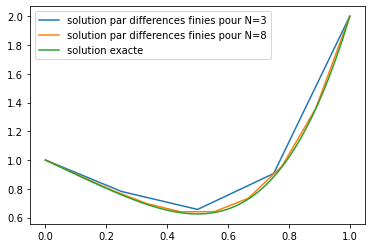

In [78]:
from matplotlib import pyplot as plt
def f1(x):
    return(-24*x**2)
x1=np.linspace(0,1,5)
x2=np.linspace(0,1,10)
V1=poisson_dirichlet(f1,0,1,1,2,3) 
V2=poisson_dirichlet(f1,0,1,1,2,8) 
x3=np.linspace(0,1,100)
U3=np.ones(100)-x3+2*x3**4
plt.plot(x1,V1,label="solution par differences finies pour N=3")
plt.plot(x2,V2,label="solution par differences finies pour N=8")
plt.plot(x3,U3,label="solution exacte")
plt.legend()

### Exercices


__Exercice 1__

On souhaite mettre en évidence numériquement l'ordre de convergence du schéma. On considère donc l'exemple du segment $a=0$, $b=1$, de la fonction $f(x)=\sin(x)$ et des conditions au bord $\alpha=0$ et $\beta=\sin(1)$ pour lequel la solution explicite est $u(x)=\sin(x)$. On définit pour tout pas d'espace $\Delta x$ l'erreur :
$$
e_i(\Delta x)= u(x_i)-v_i=\sin(x_i)-v_i
$$
où $(v_{-1},...,v_{N})$ est la solution calculée par le schéma numérique `poisson_dirichlet(f,a,b,alpha,beta,N)` pour ce problème particulier.

__1.__ Ecrire une fonction `norme_erreur(N)` qui pour ce choix particulier de $a,b,f,\alpha,\beta$, renvoie
$$
E_N=\max_{-1\leq i \leq N} |e_i(\Delta x)|
$$
Vous pourrez vous aider de `numpy.linalg.norm` pour calculer la norme $\infty$ (pensez à appeler l'aide avec help() pour voir comment paramètrer cette fonction).

__2.__ Représenter numériquement la courbe de $E_N$ en fonction de $N$, avec une échelle logarithmique en utilisant la fonction `loglog` de pyplot.

__3.__ Déterminer à l'aide d'une régression linéaire la pente de la courbe de la fonction $\log N\mapsto\log E_N$ (en pourra utiliser les méthodes vues pour la méthode des moindres carrés dans la partie "optimisation" du cours). Quel est ainsi l'ordre de convergence du schéma que l'on voit empiriquement sur cet exemple ?

__Exercice 2__

On se propose maintenant de résoudre le problème de Poisson avec conditions au bord de Neumann et une condition sur la masse de la solution :
$$
(5)\qquad \left\{ \begin{array}{l l}
-u''=f(x),\\
u'(a)=\lambda, \quad u'(b)=\mu, \quad \int_a^b u(x)dx=m
\end{array} \right.
$$
__1.__ Montrer à la main que s'il existe une solution $u$ de (5) alors la condition suivante de compatibilité est satisfaite :
$$
(6)\qquad \int_a^b f dx= \lambda-\mu .
$$

__2.__ On suppose désormais la condition (6) satisfaite. On subdivise $[a,b]$ en $N$ intervalles de longueur $\Delta x=\frac{b-a}{N}$ en posant $x_i=a+i\Delta x$ pour $i=0,...,N$. Notez que cette décomposition est légèrement différente de celle faite pour les conditions de Dirichlet, car $x_0=a$ et $x_N=b$. On résout numériquement en approximant $u(x_i)$ par $v_i$. On transforme la dernière égalité de la seconde ligne de (5) en :
$$
(7)\qquad \Delta x \sum_{i=0}^{N-1} v_i=m
$$
et la deuxième en
$$
(8)\qquad \frac{v_{N}-v_{N-1}}{\Delta x}=\mu.
$$
On transforme la première ligne de (5) en
$$
(9)\qquad -\frac{v_{i+1}-2v_i+v_{i-1}}{\Delta x^2}=f(x_i) \qquad \forall 1\leq i \leq N-1.
$$
On pose $\tilde V=(v_{0},...,v_{N-1})$. Mettre à la main les équations (7), (8) et (9) sous la forme 
$$
(10)\qquad \tilde M \tilde V=\tilde F
$$
et donner l'expression de $\tilde M$, ainsi que celle de $\tilde F$ en fonction de $\mu$, $m $ et $f$.

__4.__ On peut montrer (mais ce n'est pas l'objet de cet exercice) qu'il existe une unique solution de (10). Écrire en vous aidant de vos réponses aux questions précédentes et en vous inspirant du code de `poisson_dirichlet` une fonction `poisson_neumann(f,a,b,la,mu,N)` qui calcule la solution $V=(v_{-1},...,v_{N})$ par cette méthode.

__5.__ Illustrer votre exemple pour le cas de $f(x)=-2$, $\mu=2$ et $m=4/3$. Le comparer avec la solution explicite $u(x)=1+x^2$.

__Exercice 3 (preuve de la Proposition 1)__

Cet exercice est entièrement à la main.

__1.__ Montrer que si $u\in C^2([a,b],\mathbb R)$ satisfait $-u''(x)=f(x)$ pour tout $x\in (a,b)$, alors il existe $c_1,c_2\in \mathbb R$ tels que pour tout $x\in [a,b]$:
$$
u(x)=c_1+c_2 x-\int_a^{x} \left( \int_{a}^y f(z)dz\right)dy.
$$

__2.__ Déduire de __1.__ que si $u\in C^2([a,b],\mathbb R)$ résout (1), alors 
$$
u(x)=\alpha+\left(\frac{\beta}{b-a}+\frac{1}{b-a}\int_a^{b} \left( \int_{a}^y f(z)dz\right)dy\right) (x-a)-\int_a^{x} \left( \int_{a}^y f(z)dz\right)dy.
$$

__3.__ Terminer la preuve de la Proposition.

__Exercice 4 (preuve de la Proposition 2)__

Cet exercice est entièrement à la main. Pour $N\geq 3$ on considère la matrice symmétrique $M=M_N$ définie par (4).

__1.__ Montrer que pour $y=(y_0,...,y_{N-1})\in \mathbb R^{N}$ on a
$$
y^T M_N y =2\sum_{i=0}^{N-1} y_i^2-2 \sum_{i=0}^{N-2} y_iy_{i+1}.
$$
Montrer ensuite (vous pourrez par exemple utiliser l'inégalité de Cauchy $|ab|\leq \frac{a^2}{2}+\frac{b^2}{2}$) que
$$
\left|\sum_{i=0}^{N-2}y_iy_{i+1}\right|\leq \frac 12 y_0^2+\frac 12 y_{N-1}^2+ \sum_{i=1}^{N-2}y_i^2.
$$
En déduire que
$$
y^TM_Ny\geq y_0^2+y_{N-1}^2 \geq 0.
$$

__2.__ On suppose que $y^TM_Ny=0$. On pose $y'=(y_1,...,y_{N-2})$. Montrer à l'aide de la question 2. que $y_0=0$ et $y_{N-1}=0$. Montrer ensuite que $y'$ satisfait $y^{'T}M_{N-2}y'=0$. En déduire que $y_1=0$ et $y_{N-2}=0$. En déduire par une induction que $y=(0,...,0)$.

__3.__ Déduire des questions __1.__ et __2.__ qu'elle est définie positive au sens où $y^TMy>0$ pour tout $y\neq (0,...,0)$

__4.__ En reprenant l'algorithme du pivot du cours sur les systèmes linéaires pour la décomposition $LU$, calculer les matrices $L$ et $U$ à la main de la décomposition $LU$ de $M_N$, et montrer que cela ne nécessite que $O(N)$ opérations.

__5.__ Justifier que $M_N$ admet une décomposition de Cholesky.